In [32]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

In [15]:
df = pd.read_csv('KNN_DATA.csv')
df.head()

,Class,Knowledge,Enthusiasm,Organization,Preparedness,Explain Concepts,Speaking Ability,Approachability,Encourage Discussion,Effectiveness of Eg.,Rating
0,HPC Fall 2015,4.714286,4.857143,4.571429,4.571429,4.571429,4.571429,4.857143,4.857143,4.571429,AA
1,ECPE127 Spring 16,4.812500,4.843750,4.781250,4.750000,4.437500,4.625000,4.843750,4.625000,4.516129,AA
2,ECPE 170 Spring 16,4.181818,4.300000,4.363636,4.272727,3.909091,4.222222,4.181818,4.000000,4.272727,BA
3,ECPE124 Fall 16,4.714286,5.000000,4.666667,4.636364,4.285714,4.666667,4.571429,4.571429,4.285714,AA
4,ECPE 170 Fall 16,4.400000,4.650000,4.100000,4.200000,3.850000,4.300000,4.250000,4.210526,3.750000,BA


In [17]:
df['Rating'].unique()

array(['AA', 'BA', 'E', 'P', 'Av'], dtype=object)

In [18]:
df['Rating'] = df['Rating'].map({'P':0,'BA' :1, 'Av':2, 'AA' :3, 'E' :4}).astype(int) #mapping numbers
df.head()

,Class,Knowledge,Enthusiasm,Organization,Preparedness,Explain Concepts,Speaking Ability,Approachability,Encourage Discussion,Effectiveness of Eg.,Rating
0,HPC Fall 2015,4.714286,4.857143,4.571429,4.571429,4.571429,4.571429,4.857143,4.857143,4.571429,3
1,ECPE127 Spring 16,4.812500,4.843750,4.781250,4.750000,4.437500,4.625000,4.843750,4.625000,4.516129,3
2,ECPE 170 Spring 16,4.181818,4.300000,4.363636,4.272727,3.909091,4.222222,4.181818,4.000000,4.272727,1
3,ECPE124 Fall 16,4.714286,5.000000,4.666667,4.636364,4.285714,4.666667,4.571429,4.571429,4.285714,3
4,ECPE 170 Fall 16,4.400000,4.650000,4.100000,4.200000,3.850000,4.300000,4.250000,4.210526,3.750000,1


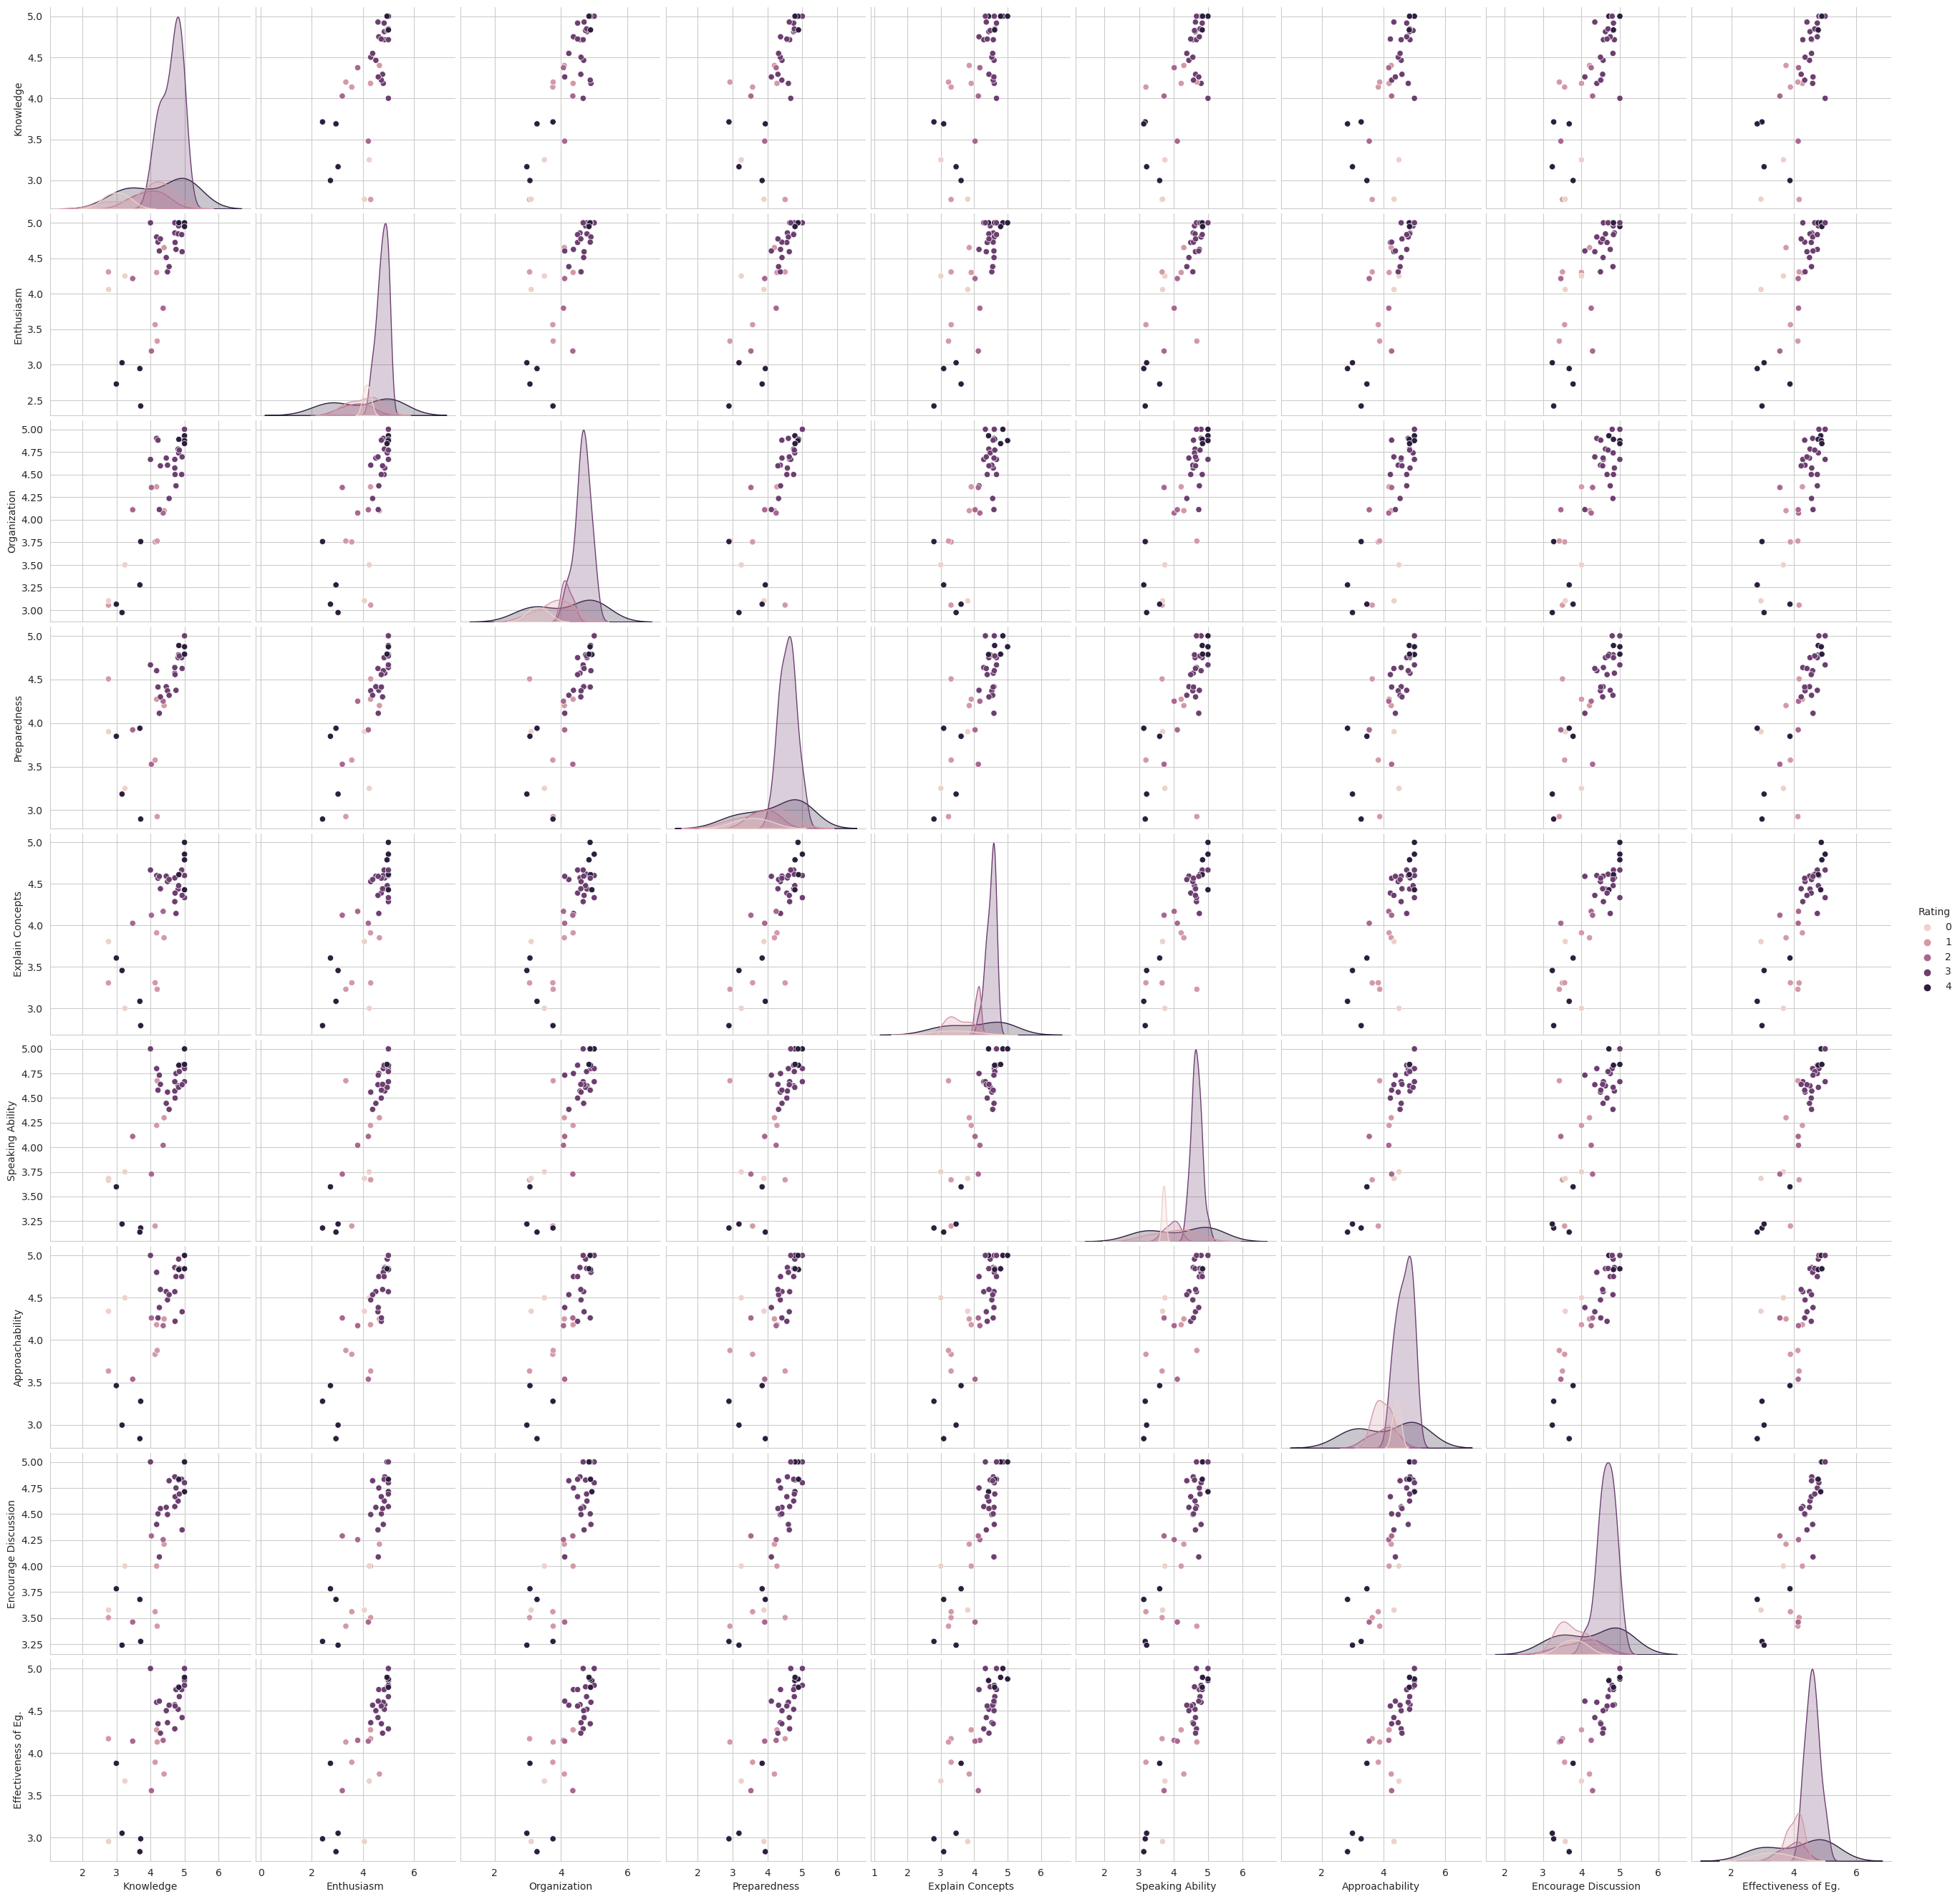

In [19]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df, hue='Rating', height=3);
plt.show()

In [22]:
x_data = df.drop(['Rating','Class'],axis=1)
y_data = df['Rating']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['Knowledge', 'Enthusiasm', 'Organization', 'Preparedness', 'Explain Concepts', 'Speaking Ability', 'Approachability', 'Encourage Discussion', 'Effectiveness of Eg.'])
df.head()

,Class,Knowledge,Enthusiasm,Organization,Preparedness,Explain Concepts,Speaking Ability,Approachability,Encourage Discussion,Effectiveness of Eg.,Rating
0,HPC Fall 2015,4.714286,4.857143,4.571429,4.571429,4.571429,4.571429,4.857143,4.857143,4.571429,3
1,ECPE127 Spring 16,4.812500,4.843750,4.781250,4.750000,4.437500,4.625000,4.843750,4.625000,4.516129,3
2,ECPE 170 Spring 16,4.181818,4.300000,4.363636,4.272727,3.909091,4.222222,4.181818,4.000000,4.272727,1
3,ECPE124 Fall 16,4.714286,5.000000,4.666667,4.636364,4.285714,4.666667,4.571429,4.571429,4.285714,3
4,ECPE 170 Fall 16,4.400000,4.650000,4.100000,4.200000,3.850000,4.300000,4.250000,4.210526,3.750000,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [34]:
#confustion_matrix = metrics.confusion_matrix(y_test, ypred)
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3, 4, 5])
#cm_display.plot()
#plt.show()
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[0 0 0 0 1]
 [0 0 1 1 0]
 [0 0 0 1 0]
 [0 0 0 3 0]
 [0 0 0 0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.60      1.00      0.75         3
           4       0.50      1.00      0.67         1

    accuracy                           0.50         8
   macro avg       0.22      0.40      0.28         8
weighted avg       0.29      0.50      0.36         8

Accuracy: 0.5


/home/dirichlet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dirichlet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dirichlet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
